In [14]:
import pyodbc
import pandas as pd

In [34]:
SERVER_NAME = 'DESKTOP-QVI73E0'
DATABASE_NAME = 'BIG MART'

conn = pyodbc.connect(
'DRIVER={SQL Server};SERVER='+SERVER_NAME+';DATABASE='+DATABASE_NAME
)

In [35]:
cursor = conn.cursor()

In [22]:
query = "SELECT  * FROM dbo.[bigmart-data-MAIN]"

In [23]:
df = pd.read_sql(query, conn)

In [25]:
df.head(5)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,None,Tier 2,Supermarket Type1,2552.6772
1,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,None,Tier 2,Supermarket Type1,3829.0158
2,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
3,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
4,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924


In [46]:
query_2 = "SELECT * FROM dbo.[bigmart-data-MAIN] WHERE item_weight IS NULL "

df_2 = pd.read_sql(query_2, conn)

df_2

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDE52,None,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
1,FDK57,None,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
2,FDN52,None,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
3,FDQ60,None,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


### Fill the missing vaues in item_weight with max

In [95]:
cursor = conn.cursor()
update_weight = "UPDATE dbo.[bigmart-data-MAIN] SET item_weight = B.max_weight FROM dbo.[bigmart-data-MAIN] A  INNER JOIN (SELECT item_identifier, MAX(item_weight) AS max_weight FROM dbo.[bigmart-data-MAIN] GROUP BY item_identifier) B ON A.item_identifier = B.item_identifier "

sql = update_weight.format('NULL')

cursor.execute(update_weight)

conn.commit()
# conn.close()

In [98]:
query = "SELECT * FROM dbo.[bigmart-data-MAIN] WHERE item_weight IS NULL"

data = pd.read_sql(query, conn)

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            4 non-null      object 
 1   item_weight                0 non-null      object 
 2   item_fat_content           4 non-null      object 
 3   item_visibility            4 non-null      float64
 4   item_type                  4 non-null      object 
 5   item_mrp                   4 non-null      float64
 6   outlet_identifier          4 non-null      object 
 7   outlet_establishment_year  4 non-null      int64  
 8   outlet_size                4 non-null      object 
 9   outlet_location_type       4 non-null      object 
 10  outlet_type                4 non-null      object 
 11  item_outlet_sales          4 non-null      float64
dtypes: float64(3), int64(1), object(8)
memory usage: 512.0+ bytes


In [74]:
update_size = "UPDATE dbo.[bigmart-data-MAIN] SET outlet_size = 'Small' WHERE outlet_size IS NULL"

# sql_ = update_size.format("'Small'", "''")

cursor.execute(update_size)
conn.commit()

In [99]:
queries = "SELECT * FROM dbo.[bigmart-data-MAIN]"

data = pd.read_sql(queries, conn)
# data.outlet_size.unique()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8519 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Reading data in python

In [52]:
train_data = pd.read_csv('C:/Users/J.C/Desktop/PROJECTS-CHINONSO/Data-Science-Projects/Projects/4/BIGMARTData/train_kOBLwZA.csv')

In [53]:
test_data = pd.read_csv('C:/Users/J.C/Desktop/PROJECTS-CHINONSO/Data-Science-Projects/Projects/4/BIGMARTData/test_t02dQwI.csv')

In [58]:
train_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6847,DRM59,5.88,Low Fat,0.003612,Hard Drinks,154.1998,OUT017,2007,NaN,Tier 2,Supermarket Type1,3537.3954
1265,NCO41,NaN,Low Fat,0.018758,Health and Hygiene,96.9384,OUT027,1985,Medium,Tier 3,Supermarket Type3,2167.8448
1117,FDV49,10.00,Low Fat,0.025827,Canned,263.2226,OUT046,1997,Small,Tier 1,Supermarket Type1,3700.5164
3848,FDQ52,NaN,Low Fat,0.118807,Frozen Foods,248.8434,OUT027,1985,Medium,Tier 3,Supermarket Type3,6705.2718
4410,FDT57,NaN,Low Fat,0.018943,Snack Foods,236.0248,OUT027,1985,Medium,Tier 3,Supermarket Type3,6636.6944


In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Preprocessing in Python

In [104]:
import numpy as np

In [106]:
np.sum(train_data['Item_Weight'].isna())

1463

### Impute missing values for Item_Weight

In [116]:
Item_train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data.groupby('Item_Identifier')['Item_Weight'].transform('max'))

np.sum(train_data['Item_Weight'].isna())

4

#impute missing values for outlet_size
 

In [117]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna('Small')

In [118]:
train_data['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8519 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [238]:
df = train_data[train_data['Item_Weight'].notna()]

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [240]:
sum(df['Item_Weight'].isna())

0

#change item_fat_content to standard type

In [241]:
df.Item_Fat_Content.value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [242]:
df.replace({'Item_Fat_Content':{'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular' }}, inplace=True)

c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [243]:
df.Item_Fat_Content.value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

### Data Analysis

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

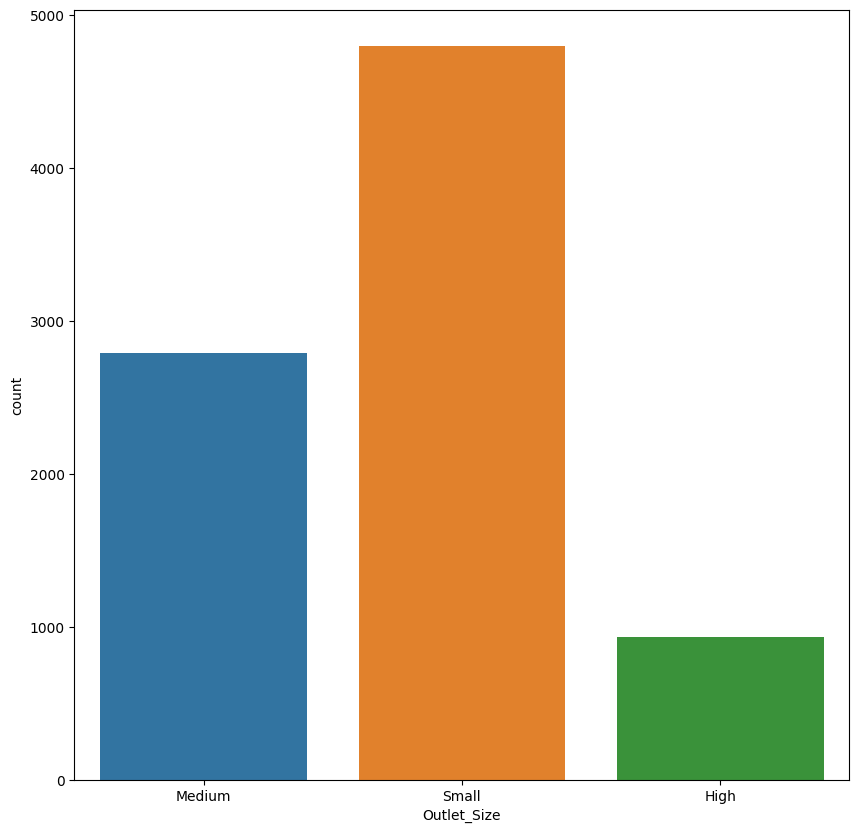

In [148]:
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Size', data=df)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

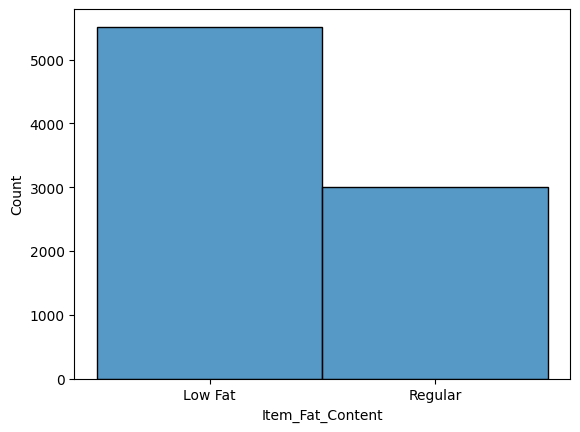

In [149]:
sns.histplot(x='Item_Fat_Content', data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

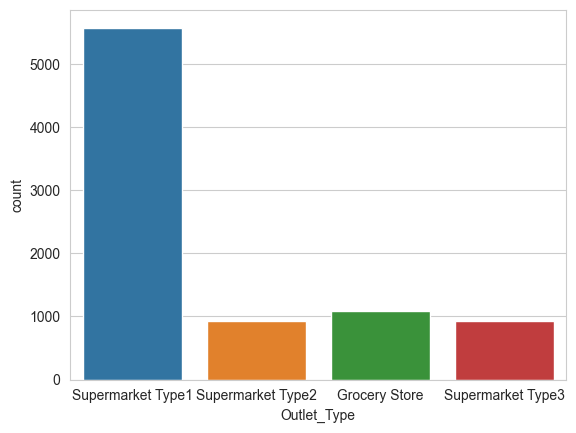

In [156]:
sns.set_style('whitegrid')
# sns.displot(df['Outlet_Type'], kde=False, color='Red', bins=5)
sns.countplot(x='Outlet_Type', data=df)

In [155]:
# sns.jointplot(x='Outlet_Type', y='Outlet_Size', data=df)

In [163]:
# sns.jointplot(x='Item_Outlet_Sales', y='Outlet_Establishment_Year', data=df, kind='kde')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

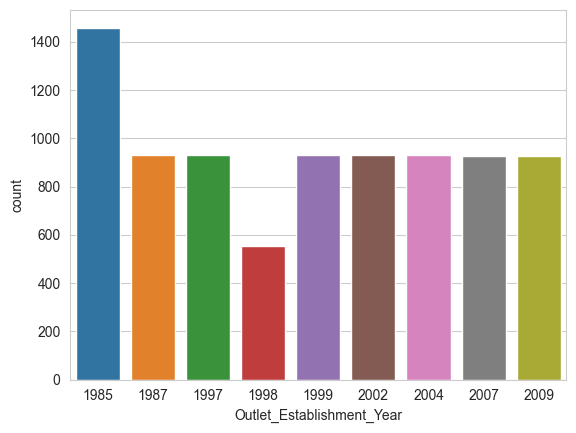

In [164]:
sns.countplot(x='Outlet_Establishment_Year', data=df)

c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

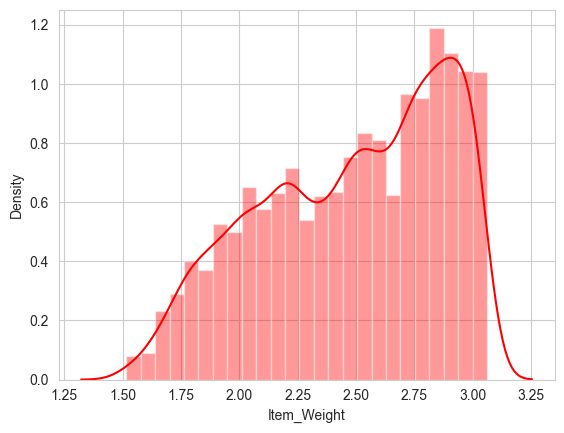

In [166]:
#weight distribution plot
sns.distplot(np.log(df['Item_Weight']), color='red')

c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Density'>

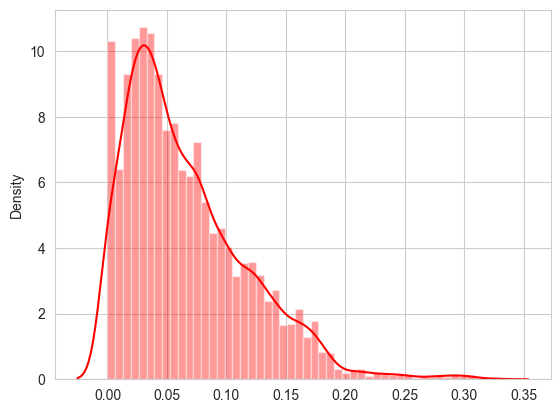

In [169]:
sns.distplot(x=df['Item_Visibility'] ,color='red')

c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

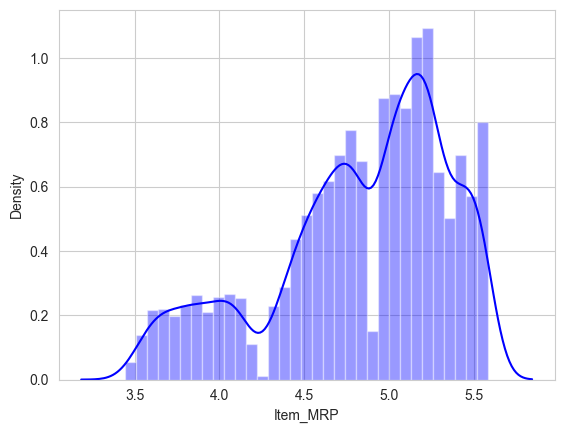

In [170]:
sns.distplot(np.log(df['Item_MRP']), color='blue')

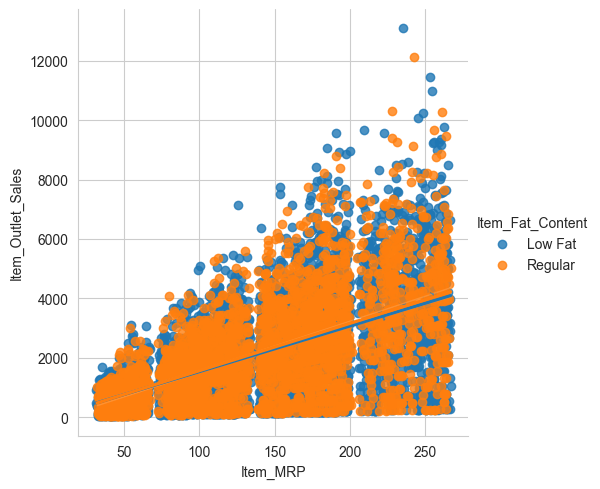

In [173]:
sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df)

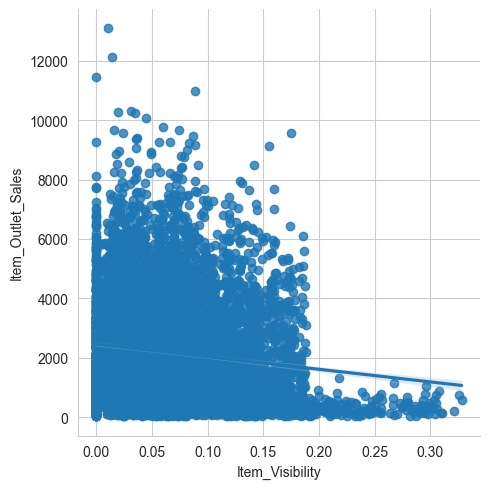

In [174]:
sns.lmplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales')

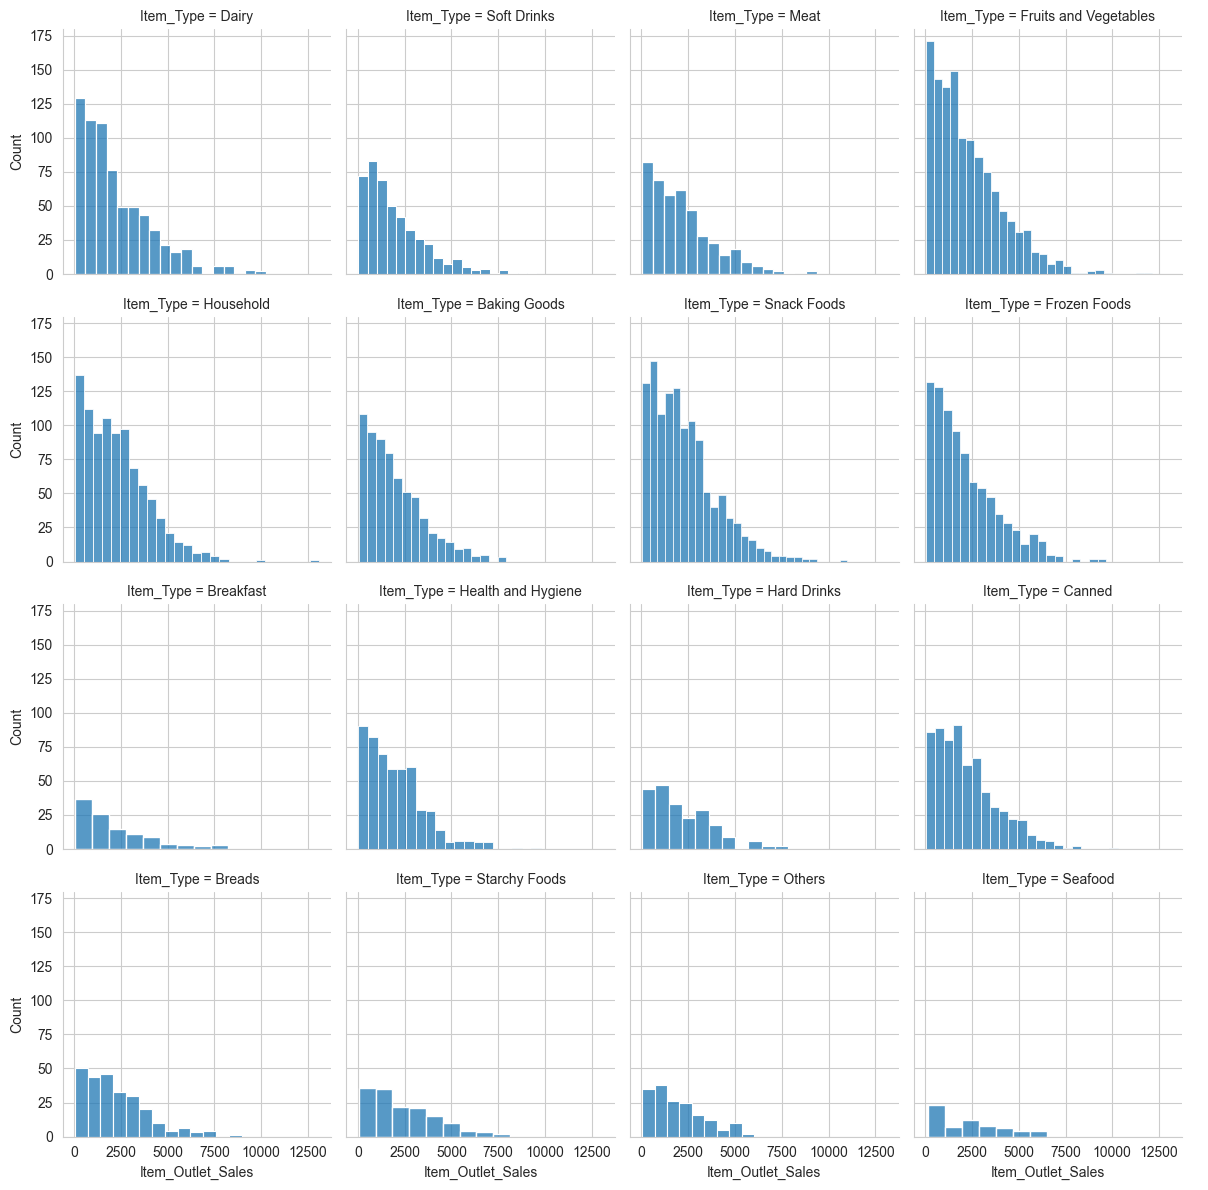

In [179]:
sns.FacetGrid(df, col='Item_Type', col_wrap=4).map(sns.histplot, 
                                                   'Item_Outlet_Sales').add_legend()

<AxesSubplot:>

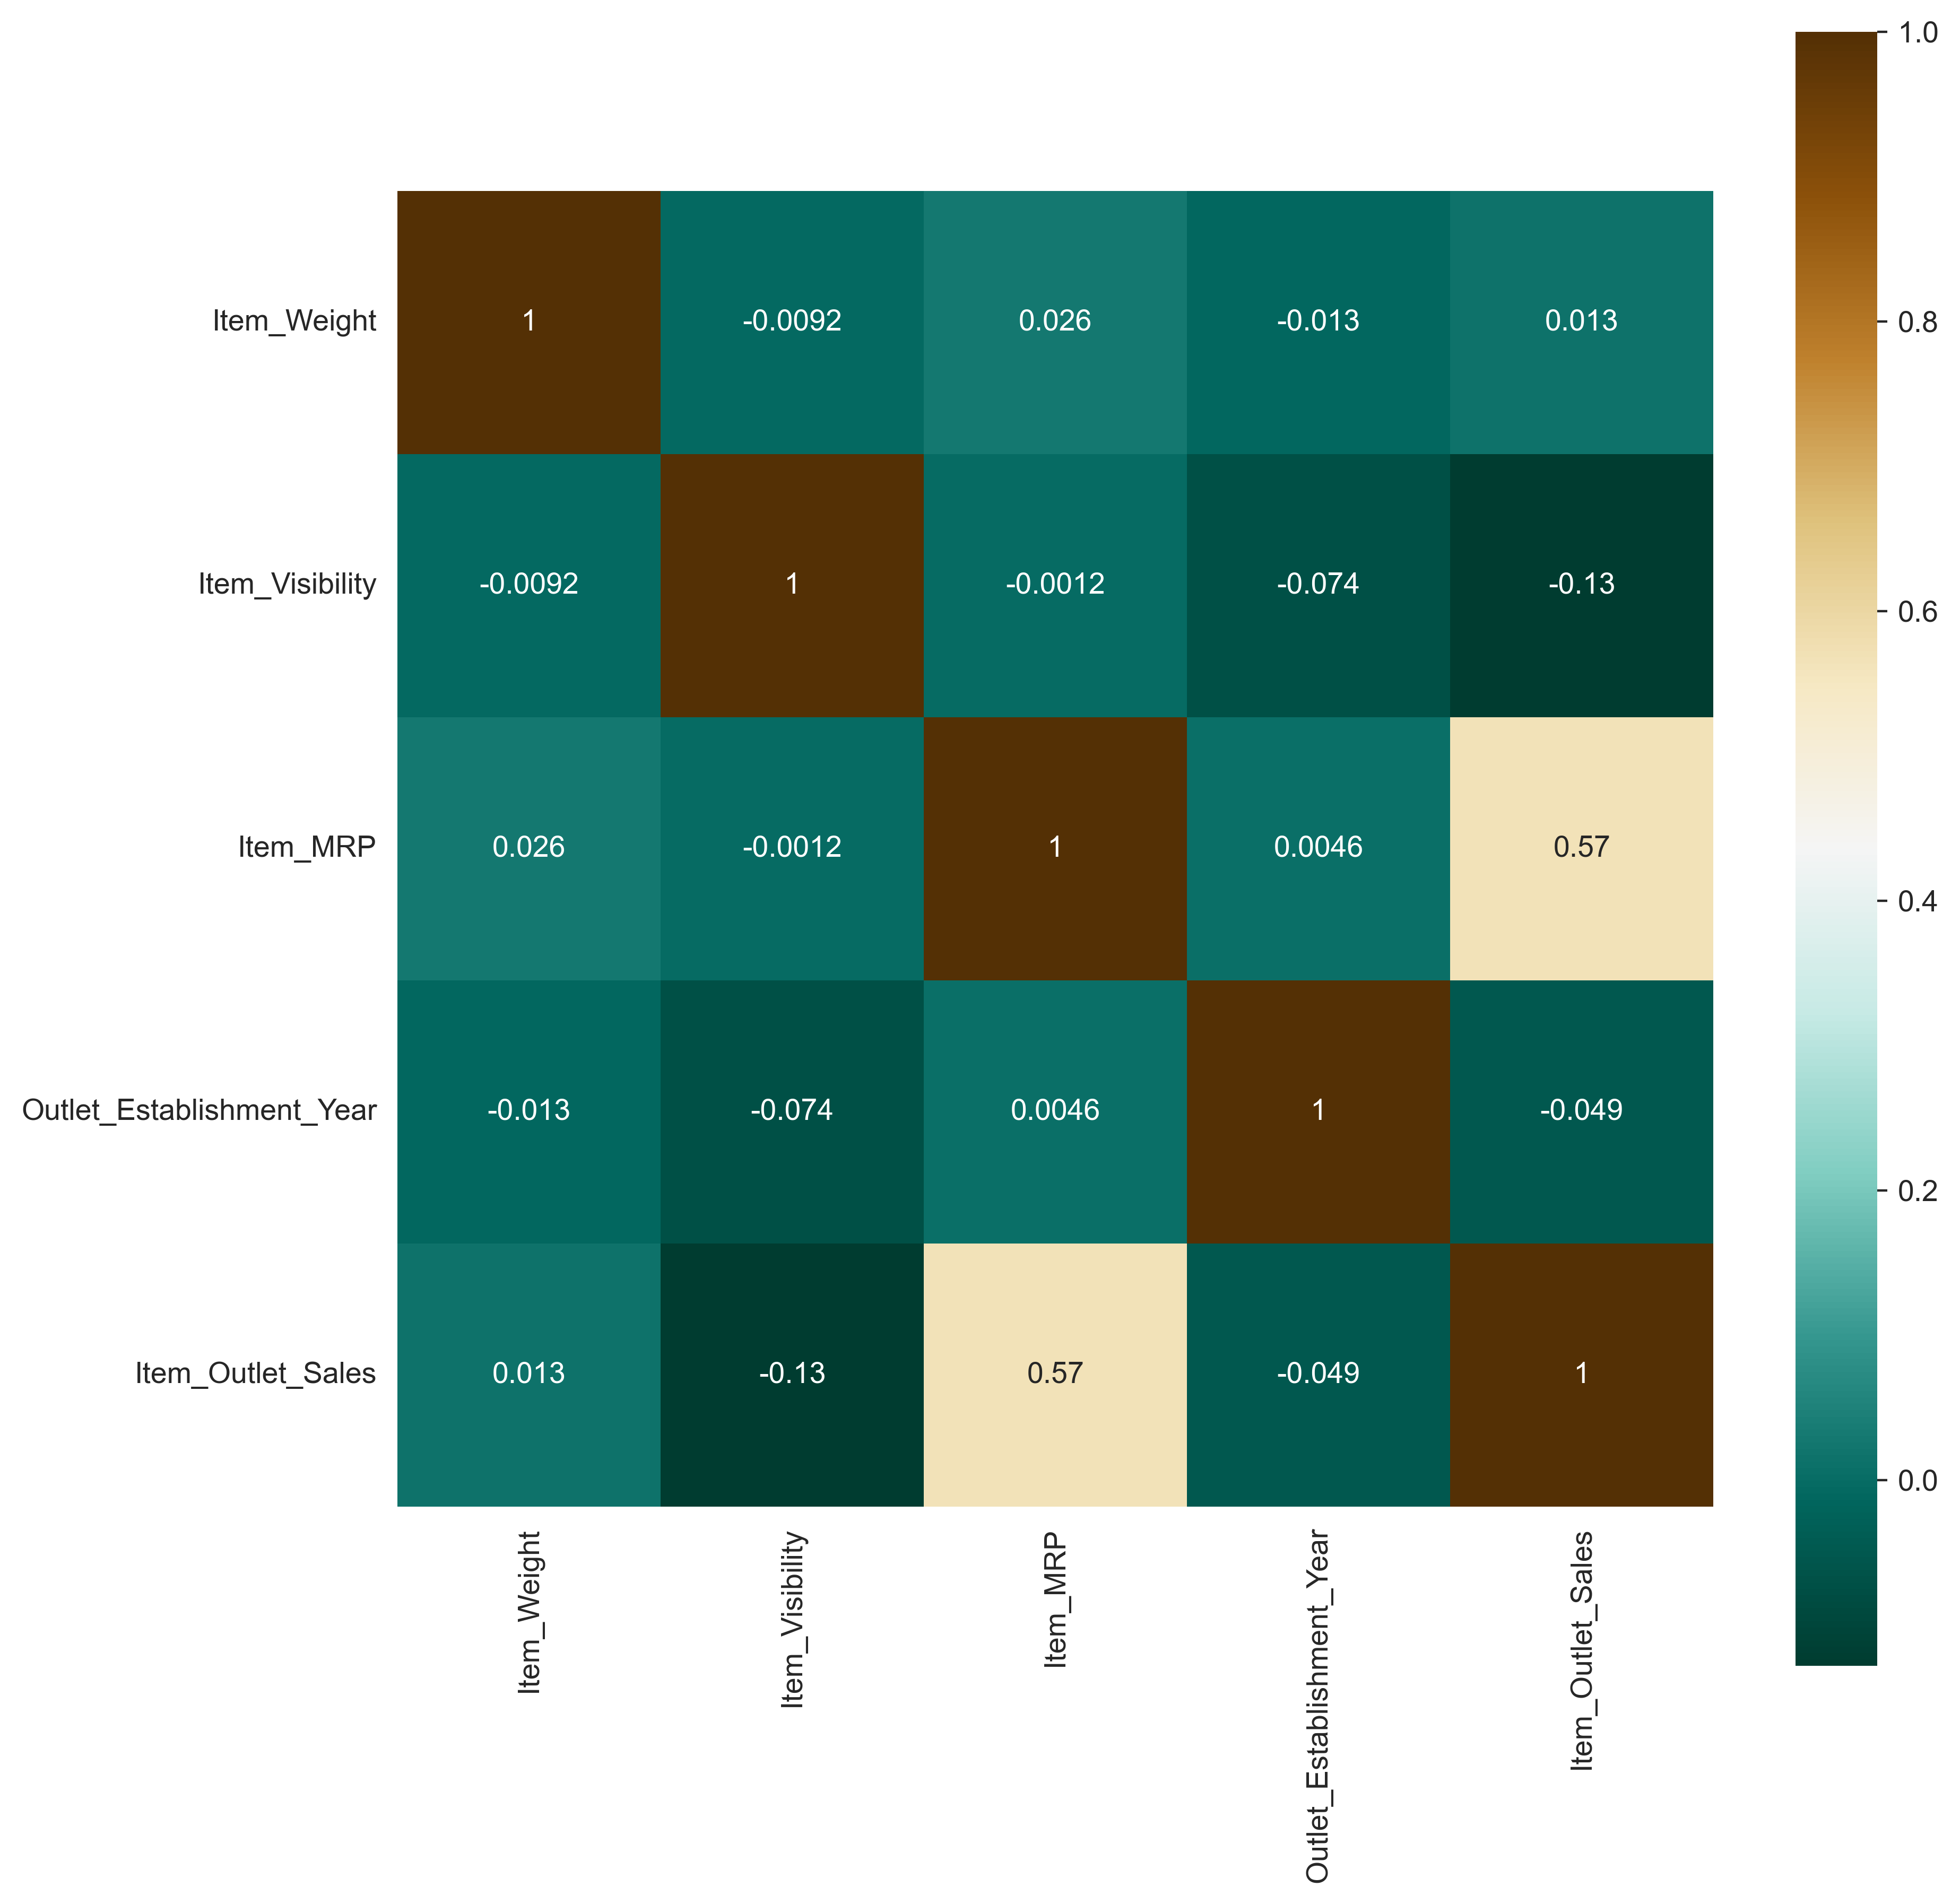

In [189]:
#Pearson's Correlation
import matplotlib.pyplot as mpl

mpl.rcParams['figure.dpi'] = 400
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, cmap='BrBG_r')

### Item_MRP has the highest correlation with Item_Outlet_Sales

### Categorical Correlation

### Chi Squared Test

    Note that:
    1. Chi Squared work only on categorical variable
    2. The sample size must be relatively large
    
  In the code snippet below we try to determine if there exists any relationship between the two categorical variables:  Outlet_Size and Outlet_Location_Type
  
  The pd.crosstab function computes a frequency table for the categorical variables. Then chi2_contigency is used to compute the relationship score

In [190]:
cross_tab = pd.crosstab(index=df['Outlet_Size'], columns=df['Outlet_Location_Type'])

print(cross_tab)

Outlet_Location_Type  Tier 1  Tier 2  Tier 3
Outlet_Size                                 
High                       0       0     932
Medium                   930       0    1860
Small                   1457    2785     555


In [198]:
#chi2 contigency table
from scipy.stats import chi2_contingency
result = chi2_contingency(cross_tab)

# check = np.array(pd.crosstab(df['Outlet_Size'], df['Outlet_Location_Type'], rownames=None, colnames=None))
# check

array([[   0,    0,  932],
       [ 930,    0, 1860],
       [1457, 2785,  555]], dtype=int64)

In [195]:
result

(4804.376637943735,
 0.0,
 4,
 array([[ 261.14379622,  304.68599601,  366.17020777],
        [ 781.75020542,  912.0964902 , 1096.15330438],
        [1344.10599836, 1568.21751379, 1884.67648785]]))

In [196]:
print("The p-value is: ", result[1])

The p-value is:  0.0


### Cramer's V test

In [206]:
def cramers_v(var1, var2):
    cross_tab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat=chi2_contingency(cross_tab)[0]
    obs = np.sum(cross_tab)
    var3 = min(cross_tab.shape)-1
    return (stat/(obs*var3))

In [202]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

In [203]:
for i in df[['Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type']].columns:
    data_encoded[i] = label.fit_transform(train_data[i])

In [204]:
data_encoded

,Outlet_Type,Outlet_Size,Outlet_Location_Type
0,1,1,0
1,2,1,2
2,1,1,0
3,0,2,2
4,1,0,2
...,...,...,...
8518,1,0,2
8519,1,2,1
8520,1,2,1
8521,2,1,2


In [207]:
var4 =[]

for var1 in data_encoded:
    col=[]
    for var2 in data_encoded:
        cramers = cramers_v(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers, 2))
        
    var4.append(col)

cramers_results = np.array(var4)

result = pd.DataFrame(cramers_results, columns=data_encoded.columns, 
                     index=data_encoded.columns)

In [208]:
result

,Outlet_Type,Outlet_Size,Outlet_Location_Type
Outlet_Type,1.00,0.32,0.28
Outlet_Size,0.32,1.00,0.28
Outlet_Location_Type,0.28,0.28,1.00


In [209]:
cramers_results

array([[1.  , 0.32, 0.28],
       [0.32, 1.  , 0.28],
       [0.28, 0.28, 1.  ]])

### One way ANOVA

    ANOVA aims to determine the difference between two population means
    We need at least one continuous variable and one categorical variable for ANOVA.
    
    This test employs the use of variance to determine if two means are different. It compares the variance of group means to the variance of the groups. 
    For one way anova, null hypothesis is that all groups have the same mean and alternative hypothesis is that at least one group has a different mean

In [211]:
#One way anova between continous variable: Item_outlet_sales and categorical: outlet_location type

In [221]:
anova_data_1 = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].apply(list)

print(anova_data)

Outlet_Location_Type
Tier 1    [3735.138, 2097.27, 1516.0266, 2187.153, 1589....
Tier 2    [1076.5986, 4710.535, 2748.4224, 1587.2672, 83...
Tier 3    [443.4228, 732.38, 994.7052, 556.6088, 343.552...
Name: Item_Outlet_Sales, dtype: object


In [217]:
pd.DataFrame(list(anova_data))

,0,1,2,3,4,5,6,7,8,9,...,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346
0,3735.1380,2097.270,1516.0266,2187.1530,1589.2646,2145.2076,1547.3192,718.3982,214.3876,4078.0250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1076.5986,4710.535,2748.4224,1587.2672,838.9080,1065.2800,2174.5028,2428.8384,5815.0972,3121.2704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,443.4228,732.380,994.7052,556.6088,343.5528,4022.7636,1977.4260,1621.8888,2303.6680,3775.0860,...,4138.6128,2117.244,3944.865,424.7804,4207.856,2479.4392,1571.288,858.882,2778.3834,1845.5976


In [213]:
from scipy.stats import f_oneway

In [222]:
anova_result = f_oneway(*anova_data_1)
anova_result

F_onewayResult(statistic=53.64761754128398, pvalue=7.025683417882415e-24)

In [216]:
print('The p-value is: ', anova_result[1] )

The p-value is:  7.025683417882415e-24


In [228]:
anova_data_2 = df.groupby('Outlet_Size')['Item_Outlet_Sales'].apply(list)


In [229]:
anova_result_2 = f_oneway(*anova_data_2)
print(anova_result_2[1])

5.140440460194412e-91


In [230]:
anova_data_3 = df.groupby('Item_MRP')['Item_Outlet_Sales'].apply(list)
result_3 = f_oneway(*anova_data_3)
print(result_3[1])

3.697581520795249e-44


### Feature Engineering

In [244]:
#drop outlet_establishment year and 4 rows

df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']

df = df.drop(columns='Outlet_Establishment_Year')


df.head()

c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


In [237]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Label encoding

In [247]:
from sklearn import preprocessing

labels = preprocessing.LabelEncoder()

cols_to_encode = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type' ]

for i in cols_to_encode:
    df[i] = labels.fit_transform(df[i])

df_new = df.drop(columns=['Item_Identifier'])
df_new = pd.get_dummies(df_new)
df_new.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,25,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,3,1,2,2,443.4228,15,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,25,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,0,2,2,0,732.3800,26,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,1,0,2,1,994.7052,37,...,0,0,0,1,0,0,0,0,0,0
5,10.395,1,0.000000,51.4008,3,1,2,2,556.6088,15,...,0,0,0,0,0,0,0,0,0,0
6,13.650,1,0.012741,57.6588,1,0,2,1,343.5528,37,...,0,0,0,0,0,0,0,1,0,0
7,19.000,0,0.127470,107.7622,5,1,2,3,4022.7636,39,...,0,0,0,0,0,0,0,1,0,0
8,16.200,1,0.016687,96.9726,7,2,1,1,1076.5986,22,...,0,0,0,0,0,0,0,0,0,0
9,19.200,1,0.094450,187.8214,2,2,1,1,4710.5350,17,...,0,0,0,0,0,0,0,0,0,0


### Splitting the data

In [249]:
from sklearn.model_selection import train_test_split

X = df_new.drop(columns=['Item_Outlet_Sales'])
y = df_new['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22222)

In [251]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6815, 25)
(1704, 25)
(6815,)
(1704,)


### Building the models

In [291]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [295]:
models = []

models.append(('LR', LinearRegression()))
models.append(('EL', ElasticNet()))
models.append(('ET', ExtraTreesRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('MLP', MLPRegressor()))

In [296]:
def model_selection_funtion_and_plot(x,y,cross_folds,models):
    results = []
    names = []
#     scoring = 'r2'
    for name, model in models:
        cv_results = cross_val_score(model, x, y, cv=cross_folds, n_jobs=1)
        results.append(cv_results)
        names.append(name)
        
        msg = "%s %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
#boxplot 

    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR 0.495818 (0.019246)
EL 0.473083 (0.008570)
ET 0.495598 (0.027836)
GB 0.590219 (0.018614)
RF 0.552225 (0.026075)


c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLP 0.483132 (0.020537)


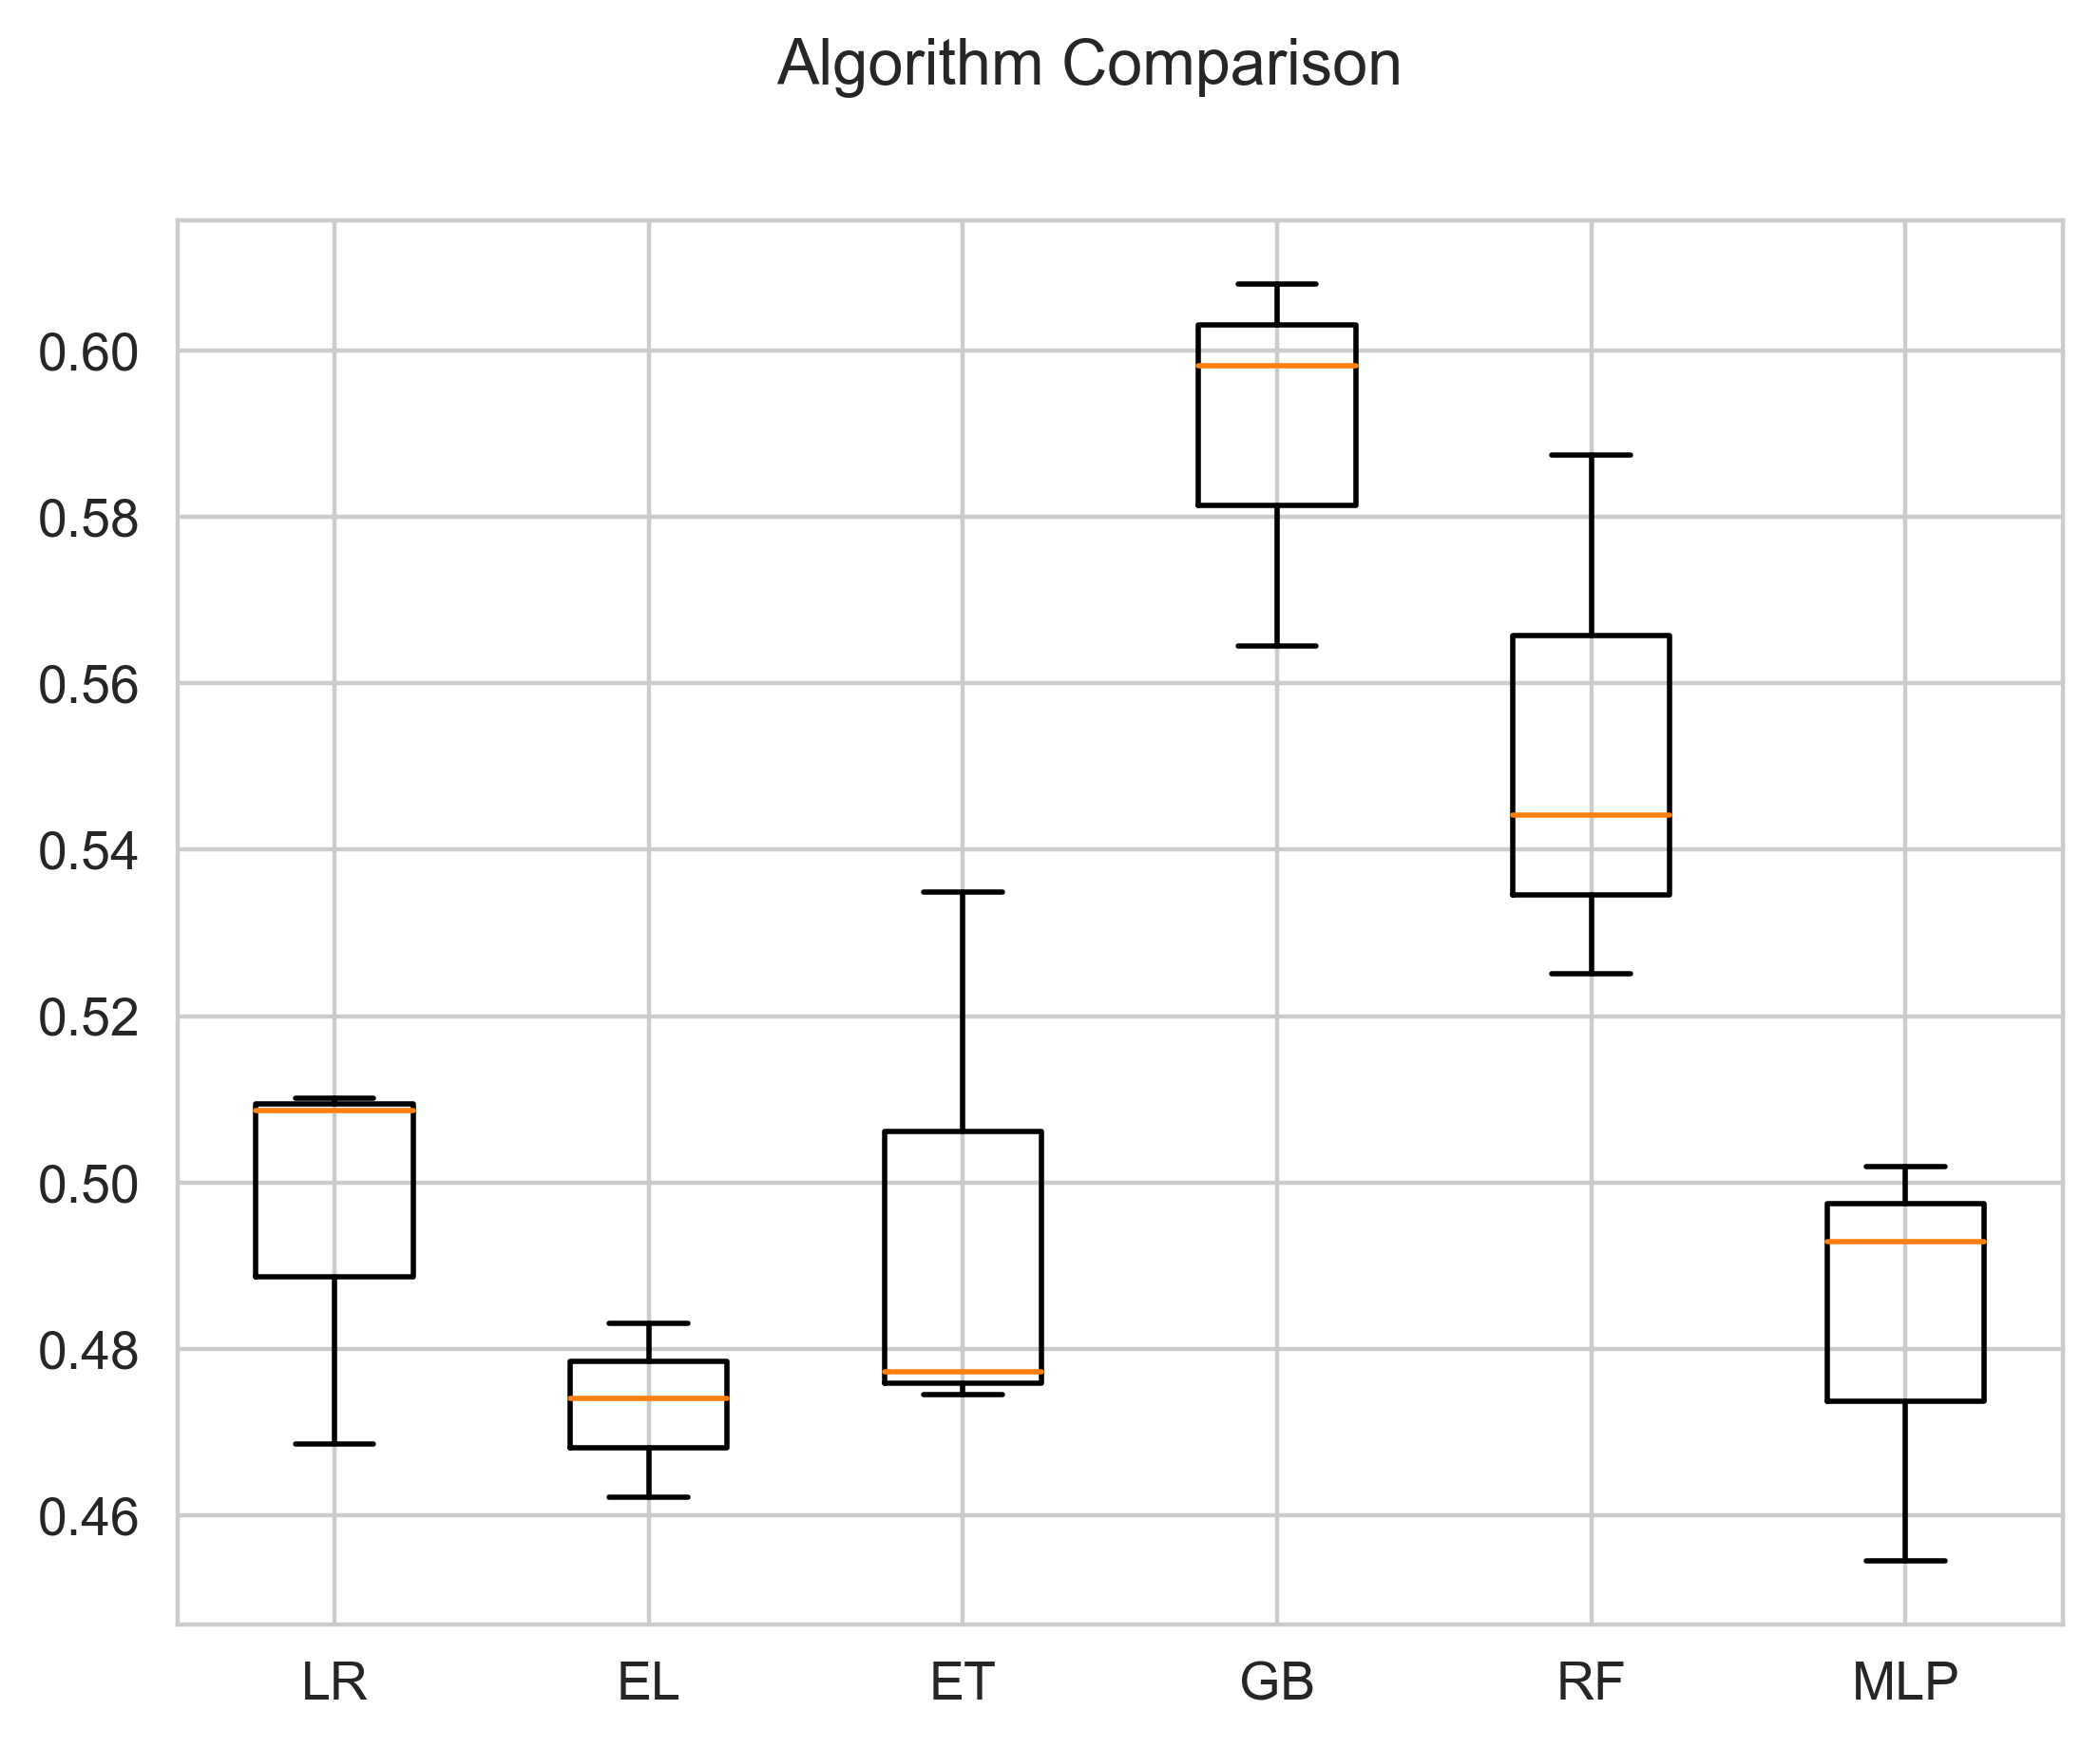

In [297]:
model_selection_funtion_and_plot(X_train, y_train, 3, models)

### Spline Regressions and MARS

In [303]:
# !pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev --quiet

### Build a voting regressor

In [310]:
from sklearn.ensemble import VotingRegressor

estimators = []
model1 = LinearRegression()
estimators.append(('LR', model1))

model2 = GradientBoostingRegressor()
estimators.append(('GBM', model2))

model3 = MLPRegressor()
estimators.append(('MLP', model3))

ensemble = VotingRegressor(estimators)

result = cross_val_score(ensemble, X_train, y_train, cv=3 )

print(result)
print(result.mean())

c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.55782612 0.52522514 0.5668573 ]
0.5499695188163951


c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [325]:
pd.DataFrame(np.array(result), columns=['Mean'], index=['LR', 'GBM', 'MLP'])

,Mean
LR,0.557826
GBM,0.525225
MLP,0.566857


### Model Stacking

In [326]:
from sklearn.ensemble import StackingRegressor

estimators = []
model1 = LinearRegression()
estimators.append(('LR', model1))

model2 = GradientBoostingRegressor()
estimators.append(('GBM', model2))

final_estimators = MLPRegressor()
stacked_model = StackingRegressor(estimators=estimators, final_estimator=final_estimators)


In [327]:
result = cross_val_score(stacked_model, X_train, y_train, cv=3)

In [328]:
result

array([0.60291086, 0.56821357, 0.59746033])

### Model Blending

In [338]:
from numpy import hstack

X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=22222)

def list_models():
    models=[]
    models.append(('LR',LinearRegression()))
    models.append(('GBR', GradientBoostingRegressor()))
    return models

def fit_all_models(models, X_train, X_val, y_train, y_val):
    level_1_feat = []
    for name, model in models:
        model.fit(X_train, y_train)
        y_hat = model.predict(X_val)
        y_hat = y_hat.reshape(len(y_hat), 1)
        level_1_feat.append(y_hat)
        
    level_1_feat = hstack(level_1_feat)
    
    level_1_estimator = MLPRegressor()
    
    level_1_estimator.fit(level_1_feat, y_val)
    
    return level_1_estimator

def pred_data(models, blends, X_test):
    meta_model_X = []
    for name, model in models:
        y_hat = model.predict(X_test)
        y_hat = y_hat.reshape(len(y_hat), 1)
        meta_model_X.append(y_hat)
    meta_model_X = hstack(meta_model_X)
    return blends.predict(meta_model_X)

models = list_models()
model_blender = fit_all_models(models, X_train_1, X_val, y_train_1, y_val )

yhat = pred_data(models, model_blender, X_train)

### Model Evaluation

In [339]:
from sklearn.metrics import r2_score

In [341]:
r2_score(y_train, yhat)

0.6290161928811523

In [342]:
results= cross_val_score(model_blender, X_train, y_train, cv=3)

c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [343]:
results

array([0.45631568, 0.45370704, 0.48444206])

### Predictions on Test set

In [344]:
y_pred = pred_data(models, model_blender, X_test)

print('R2 of Blending Model is:', r2_score(y_test, y_pred))

#Stacking model
model_stack = stacked_model.fit(X_train, y_train)
y_pred = model_stack.predict(X_test)
print('R2 of Stacked Model: ', r2_score(y_test, y_pred))


#GBM
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
print('R2 of GBM Model is: ', r2_score(y_test, y_pred))

#VotingRegressor

model = ensemble.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 of Voting Model is:', r2_score(y_test, y_pred))


R2 of Blending Model is: 0.6076448569331807
R2 of Stacked Model:  0.6101096156369442
R2 of GBM Model is:  0.6094799856055998
R2 of Voting Model is: 0.571432920908417


c:\users\j.c\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [345]:
from pygam import PoissonGAM

gam = PoissonGAM(n_splines=5).gridsearch(X_train.values, y_train)
y_pred = gam.predict(X_test.values)

print(r2_score(y_test, y_pred))

  9% (1 of 11) |##                       | Elapsed Time: 0:00:25 ETA:   0:04:17

did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:00:51 ETA:   0:03:52

did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:01:17 ETA:   0:03:26

did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:01:44 ETA:   0:03:08

did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:02:09 ETA:   0:02:33

did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:02:35 ETA:   0:02:09

did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:03:02 ETA:   0:01:45

did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:03:27 ETA:   0:01:15

did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:03:53 ETA:   0:00:52

did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:04:19 ETA:   0:00:25

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:04:45 Time:  0:04:45


did not converge
0.611967979938836


In [346]:
model_gbm = GradientBoostingRegressor()
result = cross_val_score(model_gbm, X,y, cv=5)

In [347]:
result.mean()

0.593911032181175

In [348]:
result_1 = cross_val_score(stacked_model, X,y, cv=3)
result.mean()

0.593911032181175

In [349]:
import pickle

In [ ]:
model_gbm
model
model_stack
model_blender
gam

In [350]:
gbm_file = 'gbm_model.sav'
pickle.dump(gbm_model, open(gbm_file, 'wb'))

In [351]:
voting_file = 'voting_model.sav'
pickle.dump(model, open(voting_file, 'wb'))

In [353]:
stacked_model = 'stacked_model.sav'
pickle.dump(model_stack, open(stacked_model, 'wb'))

In [354]:
blend = 'blended_model.sav'
pickle.dump(model_blender, open(blend, 'wb'))

In [355]:
gam_model = 'gam_model.sav'
pickle.dump(gam, open(gam_model, 'wb'))